In [1]:
import pandas as pd
import numpy as np
import random
import math
import seaborn as sns
import matplotlib.pyplot as plt
from ipynb.fs.full.utils import get_df, rename_values,remove_value
from ipynb.fs.full.plots import single_boxplot, single_histplot, single_violinplot
from ipynb.fs.full.bootstrapping_utils import bootstrapping_numerical_fields, confidence_interval
from statistics import mean, pstdev

In [2]:
# get formatted and ready to use dataframe
df = get_df()

In [3]:
# remove those who didn't answered
df = df[df['Q15_Model_Deploy_Production_Monitoring'] != '-77']

In [4]:
# convert column to integer - if you read before this line, you will get an string like '14'
df = df.astype({"Q15_Model_Deploy_Production_Monitoring": int}, errors='raise') 

In [5]:
valid_answers_list = list(df['Q15_Model_Deploy_Production_Monitoring'])

In [6]:
bootstrapped_list_data = bootstrapping_numerical_fields(answers=valid_answers_list, population_size=1000)

In [7]:
lower, X_mean, upper = confidence_interval(data_points=bootstrapped_list_data)
print("Mean: " + str(X_mean) + "| Lower: " + str(lower) + "| Uper: " + str(upper))

Mean: 37.951| Lower: 36.971135626427056| Uper: 38.930864373572945


In [8]:
# d5 dataframe with only one column - plots purpose
q15_df = pd.DataFrame()
q15_df['Model Deploy Production Monitoring'] = bootstrapped_list_data

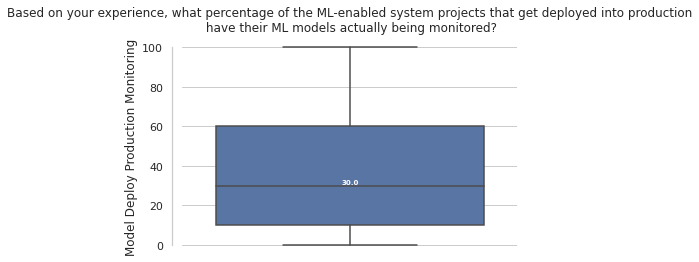

In [9]:
single_boxplot(q15_df, "Model Deploy Production Monitoring",
               title="Based on your experience, what percentage of the ML-enabled system projects that get deployed into production\n have their ML models actually being monitored?")

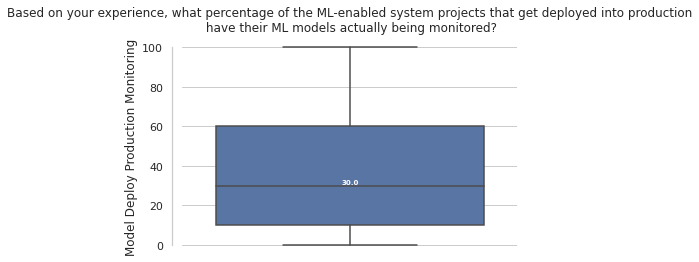

In [10]:
single_boxplot(q15_df, "Model Deploy Production Monitoring", outliers=False,
               title="Based on your experience, what percentage of the ML-enabled system projects that get deployed into production\n have their ML models actually being monitored?")

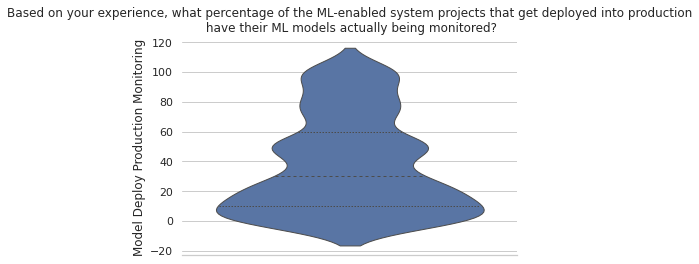

In [11]:
single_violinplot(q15_df, "Model Deploy Production Monitoring",
                  title="Based on your experience, what percentage of the ML-enabled system projects that get deployed into production\n have their ML models actually being monitored?")

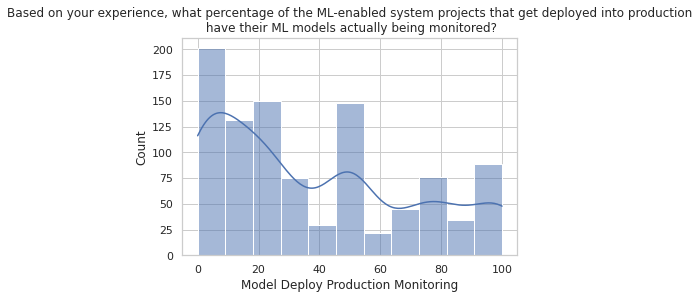

In [12]:
single_histplot(q15_df, "Model Deploy Production Monitoring",
                title="Based on your experience, what percentage of the ML-enabled system projects that get deployed into production\n have their ML models actually being monitored?")